# Incident management process enriched event log

**Phase 1: Homework specification and dataset evaluation**

### I. Problem definition and objectives to accomplish

**Problem:**  
In large organizations, the incident management process is a critical component of operational efficiency and service quality. However, factors such as team assignment, urgency level, resolution method, and documentation support may significantly influence the time it takes to resolve an incident and whether it meets the defined Service Level Agreement (SLA). Understanding these influencing factors is essential for identifying performance bottlenecks and opportunities for innovation in IT service management.

**Objective:**  
This study aims to analyze how incident handling flows vary based on assignment group, urgency, and resolution method (e.g., knowledge base usage) using event log data from a real-world IT incident management system (ServiceNow). We investigate whether certain patterns or behaviors lead to faster resolution times or improved SLA compliance.

Specifically, we explore the following research questions:
- Which factors (e.g., urgency, reassignment count, use of knowledge bases) are most predictive of SLA compliance?
- Do some assignment groups or contact types consistently perform better in terms of resolution time?
- How does the use of a knowledge base affect the speed and outcome of incident resolution?
- What insights can be drawn to support automation or optimization of service flows?


### II. Dataset Availability

The dataset selected is **Incident management process enriched event log**, this event log was extracted from data gathered from the audit system of an instance of the ServiceNow platform used by an IT company and enriched with data loaded from a relational database.

- **Instances:** 141,712 events / entries (24,918 incidents)
- **Attributes:** 36 attributes / features (1 case identifier, 1 state identifier, 32 descriptive attributes, 2 dependent variables)
- The missing values represent unknown or unavailable information rather than data errors. These will be handled accordingly in the preprocessing phase.

[Dataset Link](https://doi.org/10.24432/C57S4H)

### III. Variable Interpretation

The dataset contains 36 variables which describe various aspects of the incident management process. These can be grouped into categories for easier analysis:

#### Identifier & Process Metadata
- `number`: Unique incident identifier (24,918 unique cases)
- `incident_state`: Current state of the incident
- `active`: Boolean flag indicating whether the incident is still active
- `made_sla`: Boolean indicating whether the incident met the Service Level Agreement

#### Timestamps
- `opened_at`: When the incident was opened by the user
- `sys_created_at`: When the incident was created in the system
- `sys_updated_at`: When the system last updated the record
- `resolved_at`: When the issue was resolved
- `closed_at`: When the case was officially closed

#### Numerical Features
- `reassignment_count`: Number of times the incident was reassigned
- `reopen_count`: Number of times the incident was reopened
- `sys_mod_count`: Total number of modifications/updates

#### Process Context
- `impact`, `urgency`: Categorical values (1-High, 2-Medium, 3-Low)
- `priority`: System-calculated based on impact and urgency
- `knowledge`: Boolean indicating if a knowledge base article was used
- `u_priority_confirmation`: Boolean indicating if priority was confirmed
- `contact_type`: How the issue was reported (e.g., phone, email)
- `assignment_group`: Group responsible for handling the case
- `assigned_to`: Individual responsible for resolving the issue

#### Descriptive/Categorical Attributes
- `category`, `subcategory`: Type of service affected
- `location`: Physical or organizational location of the issue
- `close_code`: Reason for closing the incident
- `notify`: Notification behavior (email, none, etc.)
- `problem_id`, `rfc`, `caused_by`: Link to broader change/problem processes
- `caller_id`, `opened_by`, `resolved_by`, `sys_created_by`, `sys_updated_by`: Anonymized user IDs

#### Target Variables
- `made_sla`: Did the incident meet Service Level Agreement(SLA) (classification target)
- `resolved_at` and `closed_at`: Used to calculate resolution/closure time (for regression)

### IV. Data Profiling

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = "incident_event_log.csv"
df = pd.read_csv(file)

In [3]:
# Shape of dataset
df.shape

(141712, 36)

In [4]:
# Dataset sneak peek 
df.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [5]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

In [6]:
# Statistics
df.describe(include='all')

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
count,141712,141712,141712,141712.000000,141712.000000,141712.000000,141712,141712,141712,141712,...,141712,141712,141712,141712,141712,141712,141712,141712,141712,141712
unique,24918,9,2,NaN,NaN,NaN,2,5245,208,19849,...,2,2,253,182,5,4,18,217,18506,2707
top,INC0019396,Active,True,NaN,NaN,NaN,True,Caller 1904,Opened by 17,14/4/2016 20:42,...,False,Do Not Notify,?,?,?,?,code 6,Resolved by 15,?,24/3/2016 18:59
freq,58,38716,116726,NaN,NaN,NaN,132497,1425,41466,58,...,100740,141593,139417,140721,141468,141689,86583,15421,3141,3324
mean,NaN,NaN,NaN,1.104197,0.021918,5.080946,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.734673,0.207302,7.680652,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1.000000,0.000000,3.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,1.000000,0.000000,6.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Replacing ? values with  NaN for proper missing value handling
df.replace('?', np.nan, inplace=True)

In [8]:
# Dataset info after replacing ? with NaN
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141683 non-null  object
 8   opened_by                136877 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           88636 non-null   object
 11  sys_created_at           88636 non-null   object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

In [9]:
# Sum NaN values per feature
nan_value = df.isna().sum()
nan_value

number                          0
incident_state                  0
active                          0
reassignment_count              0
reopen_count                    0
sys_mod_count                   0
made_sla                        0
caller_id                      29
opened_by                    4835
opened_at                       0
sys_created_by              53076
sys_created_at              53076
sys_updated_by                  0
sys_updated_at                  0
contact_type                    0
location                       76
category                       78
subcategory                   111
u_symptom                   32964
cmdb_ci                    141267
impact                          0
urgency                         0
priority                        0
assignment_group            14213
assigned_to                 27496
knowledge                       0
u_priority_confirmation         0
notify                          0
problem_id                 139417
rfc           

In [10]:
# Statistics after replacing ? with NaN
df.describe(include='all')

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
count,141712,141712,141712,141712.000000,141712.000000,141712.000000,141712,141683,136877,141712,...,141712,141712,2295,991,244,23,140998,141486,138571,141712
unique,24918,9,2,NaN,NaN,NaN,2,5244,207,19849,...,2,2,252,181,4,3,17,216,18505,2707
top,INC0019396,Active,True,NaN,NaN,NaN,True,Caller 1904,Opened by 17,14/4/2016 20:42,...,False,Do Not Notify,Problem ID 14,CHG0000132,code 8s,CHG0000097,code 6,Resolved by 15,3/6/2016 16:29,24/3/2016 18:59
freq,58,38716,116726,NaN,NaN,NaN,132497,1425,41466,58,...,100740,141593,184,20,167,11,86583,15421,93,3324
mean,NaN,NaN,NaN,1.104197,0.021918,5.080946,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.734673,0.207302,7.680652,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1.000000,0.000000,3.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,1.000000,0.000000,6.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### V. Data Cleaning and Preprocessing

In [11]:
# Convert Timestamp to datetime
timestamp_col = ['opened_at', 'closed_at', 'resolved_at', 'sys_created_at' ,'sys_updated_at']
for col in timestamp_col:
    df[col] = pd.to_datetime(df[col], errors='coerce',dayfirst=True)

In [12]:
# recalculate the statistics 

df['resolution_time_hours'] = (df['resolved_at'] - df['opened_at']).dt.total_seconds() / 3600
df['time_to_close_hours'] = (df['closed_at'] - df['opened_at']).dt.total_seconds() / 3600

# Show updated statistics
df[['resolution_time_hours', 'time_to_close_hours']].describe()


,resolution_time_hours,time_to_close_hours
count,138571.000000,141712.000000
mean,269.596262,409.492242
std,650.867377,651.752572
min,0.000000,0.000000
25%,4.066667,125.116667
50%,73.516667,224.966667
75%,262.183333,417.750000
max,8070.166667,8190.616667


In [14]:
# Check how many rows have valid, non-negative resolution and close times
df_valid = df[
    (df['resolution_time_hours'].notna()) &
    (df['time_to_close_hours'].notna()) &
    (df['resolution_time_hours'] >= 0) &
    (df['time_to_close_hours'] >= 0)
]

print("Valid rows:", df_valid.shape[0])
df_valid[['resolution_time_hours', 'time_to_close_hours']].describe()


Valid rows: 138571


,resolution_time_hours,time_to_close_hours
count,138571.000000,138571.000000
mean,269.596262,415.023013
std,650.867377,657.639643
min,0.000000,0.033333
25%,4.066667,126.500000
50%,73.516667,235.033333
75%,262.183333,426.258333
max,8070.166667,8190.616667


In [20]:
# Encode boolean columns as integers
bool_cols = ['active', 'made_sla', 'knowledge', 'u_priority_confirmation']
df_valid[bool_cols] = df_valid[bool_cols].astype(int)

# Confirm encoding and basic description
df_valid_encoded= df_valid[bool_cols].head()
df_valid_encoded

C:\Users\acuad\AppData\Local\Temp\ipykernel_34848\3392656869.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid[bool_cols] = df_valid[bool_cols].astype(int)


,active,made_sla,knowledge,u_priority_confirmation
0,1,1,1,0
1,1,1,1,0
2,1,1,1,0
3,0,1,1,0
4,1,1,1,0


In [21]:
# Cleaned dataset
df_valid.shape

(138571, 38)

### VI. Visual Exploration (EDA) 

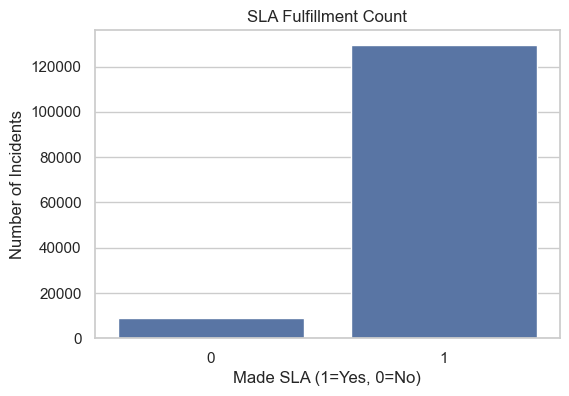

In [ ]:
sns.set(style="whitegrid")

# 1: Distribution of SLA outcomes
plt.figure(figsize=(6, 4))
sns.countplot(data=df_valid, x='made_sla')
plt.title("SLA Fulfillment Count")
plt.xlabel("Made SLA (1=Yes, 0=No)")
plt.ylabel("Number of Incidents")
plt.show()

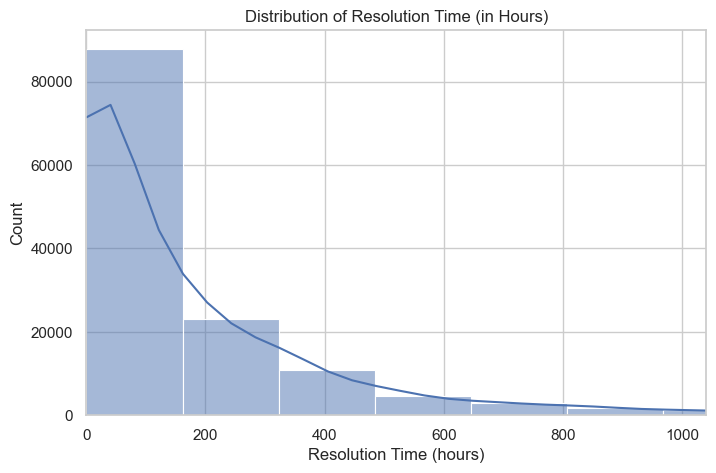

In [ ]:
# 2: Distribution of resolution times
plt.figure(figsize=(8, 5))
sns.histplot(df_valid['resolution_time_hours'], bins=50, kde=True)
plt.title("Distribution of Resolution Time (in Hours)")
plt.xlabel("Resolution Time (hours)")
plt.ylabel("Count")
plt.xlim(0, df_valid['resolution_time_hours'].quantile(0.95)) 
plt.show()

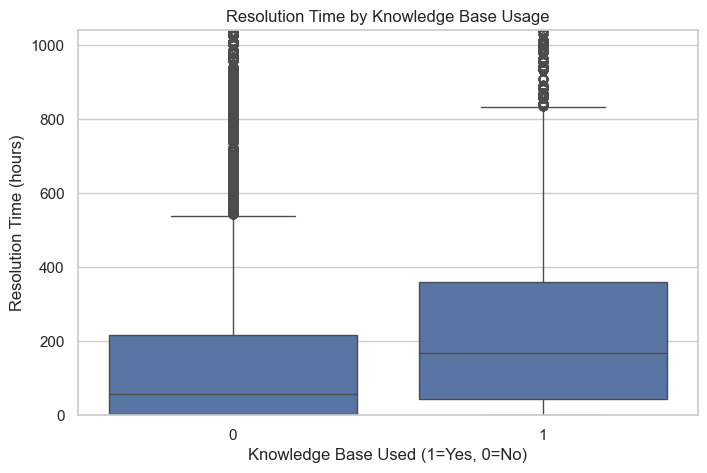

In [27]:
# 3: Boxplot of resolution time by knowledge base usage
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_valid, x='knowledge', y='resolution_time_hours')
plt.title("Resolution Time by Knowledge Base Usage")
plt.xlabel("Knowledge Base Used (1=Yes, 0=No)")
plt.ylabel("Resolution Time (hours)")
plt.ylim(0, df_valid['resolution_time_hours'].quantile(0.95))  # trim outliers
plt.show()

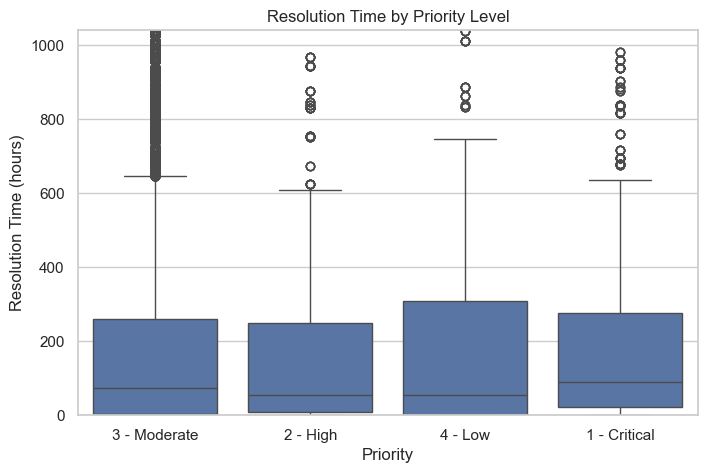

In [28]:
# 4: Resolution time by priority
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_valid, x='priority', y='resolution_time_hours')
plt.title("Resolution Time by Priority Level")
plt.xlabel("Priority")
plt.ylabel("Resolution Time (hours)")
plt.ylim(0, df_valid['resolution_time_hours'].quantile(0.95))
plt.show()

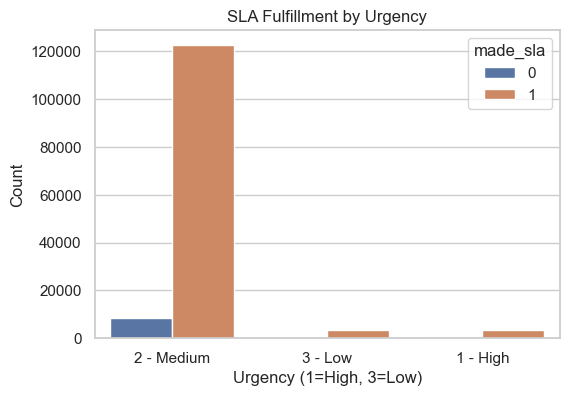

In [29]:
# 5: SLA fulfillment by urgency
plt.figure(figsize=(6, 4))
sns.countplot(data=df_valid, x='urgency', hue='made_sla')
plt.title("SLA Fulfillment by Urgency")
plt.xlabel("Urgency (1=High, 3=Low)")
plt.ylabel("Count")
plt.show()

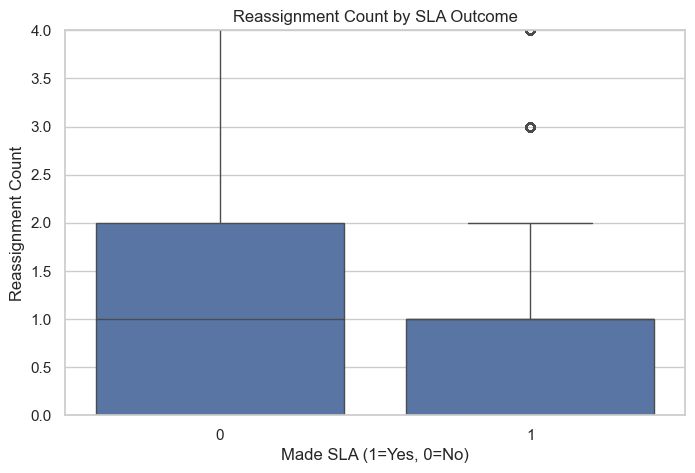

In [30]:
# 6: Reassignment count vs SLA
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_valid, x='made_sla', y='reassignment_count')
plt.title("Reassignment Count by SLA Outcome")
plt.xlabel("Made SLA (1=Yes, 0=No)")
plt.ylabel("Reassignment Count")
plt.ylim(0, df_valid['reassignment_count'].quantile(0.95))
plt.show()

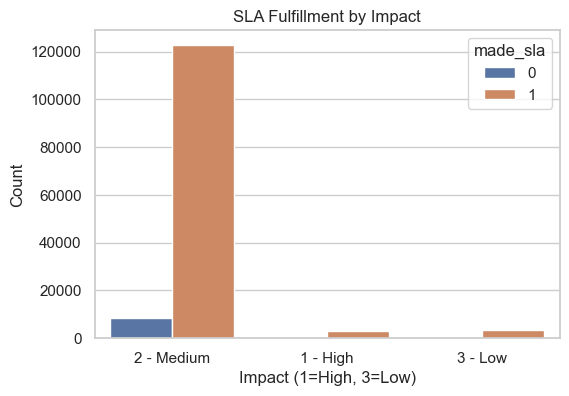

In [31]:
# 7: Impact vs SLA fulfillment
plt.figure(figsize=(6, 4))
sns.countplot(data=df_valid, x='impact', hue='made_sla')
plt.title("SLA Fulfillment by Impact")
plt.xlabel("Impact (1=High, 3=Low)")
plt.ylabel("Count")
plt.show()

### Exploratory Data Analysis (EDA)

#### 6.1 SLA Fulfillment Count
Most incidents met their SLA (`made_sla = 1`). This reveals a class imbalance, which is important to address during modeling.

#### 6.2 Resolution Time Distribution
The majority of incidents were resolved within 200 hours, but some took significantly longer. The distribution is right-skewed.

#### 6.3 Resolution Time by Knowledge Base Usage
Incidents that used a knowledge base (KB) tended to be resolved faster, suggesting that documentation improves efficiency.

#### 6.4 Resolution Time by Priority
Higher-priority incidents generally had shorter resolution times. Priority 1 and 2 incidents appear to be resolved faster than Priority 3.

#### 6.5 SLA Fulfillment by Urgency
Incidents with higher urgency (1=High) were more likely to miss the SLA, despite being higher in priority — suggesting that urgent issues are more challenging.

#### 6.6 Reassignment Count by SLA
Tickets that missed their SLA tended to have more reassignments. Each handoff likely contributes to delays and inefficiency.

#### 6.7 SLA Fulfillment by Impact
Incidents with "High Impact" (impact = 1) had a higher SLA failure rate than lower-impact ones, indicating difficulty in resolving high-stakes issues.


Based on the patterns observed during Exploratory Data Analysis, we propose the following hypotheses to guide further modeling and evaluation:

#### H1 – Knowledge Base Usage Reduces Resolution Time
Incidents that reference a knowledge base will have significantly shorter resolution times on average than those that do not.

#### H2 – Reassignment Increases SLA Violation Risk
Incidents with a higher number of reassignments are more likely to miss their SLA due to delays introduced during handoffs.

#### H3 – High-Urgency Tickets Are Harder to Resolve On Time
Despite being prioritized, high-urgency tickets have a higher SLA failure rate, potentially due to their complexity or unexpected nature.

#### H4 – High-Priority Incidents Are Resolved Faster
System-generated priority (based on urgency and impact) correlates negatively with resolution time: the higher the priority, the faster the resolution.

#### H5 – High-Impact Incidents Lead to More SLA Violations
High-impact tickets are more likely to breach SLAs compared to low-impact ones, possibly because they require more coordination and resources.


### 7. Hypotheses Based on EDA